In [101]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from feature_engine.encoding import OrdinalEncoder,CountFrequencyEncoder,OneHotEncoder,RareLabelEncoder
from feature_engine.transformation import PowerTransformer,BoxCoxTransformer,LogTransformer,YeoJohnsonTransformer

In [102]:
data = pd.read_pickle('data.pkl')
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [103]:
data.select_dtypes(include=np.object).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [104]:
variables = data.select_dtypes(include=np.object).nunique().sort_values(ascending=False)
variables = list(variables[variables<=5].index)
variables

['MSZoning',
 'Electrical',
 'ExterCond',
 'GarageCond',
 'GarageQual',
 'BldgType',
 'LotConfig',
 'HeatingQC',
 'LotShape',
 'LandContour',
 'KitchenQual',
 'MasVnrType',
 'ExterQual',
 'BsmtExposure',
 'BsmtCond',
 'BsmtQual',
 'LandSlope',
 'GarageFinish',
 'PavedDrive',
 'Utilities',
 'Street',
 'CentralAir']

In [105]:
encoder = OneHotEncoder(top_categories=3,variables=variables)
encoder.fit(data)
encoder.encoder_dict_

{'MSZoning': ['RL', 'RM', 'FV'],
 'Electrical': ['SBrkr', 'FuseA', 'FuseF'],
 'ExterCond': ['TA', 'Gd', 'Fa'],
 'GarageCond': ['TA', 'Fa', 'Gd'],
 'GarageQual': ['TA', 'Fa', 'Gd'],
 'BldgType': ['1Fam', 'TwnhsE', 'Duplex'],
 'LotConfig': ['Inside', 'Corner', 'CulDSac'],
 'HeatingQC': ['Ex', 'TA', 'Gd'],
 'LotShape': ['Reg', 'IR1', 'IR2'],
 'LandContour': ['Lvl', 'Bnk', 'HLS'],
 'KitchenQual': ['TA', 'Gd', 'Ex'],
 'MasVnrType': ['None', 'BrkFace', 'Stone'],
 'ExterQual': ['TA', 'Gd', 'Ex'],
 'BsmtExposure': ['No', 'Av', 'Gd'],
 'BsmtCond': ['TA', 'Gd', 'Fa'],
 'BsmtQual': ['TA', 'Gd', 'Ex'],
 'LandSlope': ['Gtl', 'Mod', 'Sev'],
 'GarageFinish': ['Unf', 'RFn', 'Fin'],
 'PavedDrive': ['Y', 'N', 'P'],
 'Utilities': ['AllPub', 'NoSeWa'],
 'Street': ['Pave', 'Grvl'],
 'CentralAir': ['Y', 'N']}

In [106]:
data_e = encoder.transform(data)
data_e

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageFinish_Fin,PavedDrive_Y,PavedDrive_N,PavedDrive_P,Utilities_AllPub,Utilities_NoSeWa,Street_Pave,Street_Grvl,CentralAir_Y,CentralAir_N
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,CollgCr,Norm,Norm,2Story,7,5,2003,...,0,1,0,0,1,0,1,0,1,0
2,20,80.0,9600,Veenker,Feedr,Norm,1Story,6,8,1976,...,0,1,0,0,1,0,1,0,1,0
3,60,68.0,11250,CollgCr,Norm,Norm,2Story,7,5,2001,...,0,1,0,0,1,0,1,0,1,0
4,70,60.0,9550,Crawfor,Norm,Norm,2Story,7,5,1915,...,0,1,0,0,1,0,1,0,1,0
5,60,84.0,14260,NoRidge,Norm,Norm,2Story,8,5,2000,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,Gilbert,Norm,Norm,2Story,6,5,1999,...,0,1,0,0,1,0,1,0,1,0
1457,20,85.0,13175,NWAmes,Norm,Norm,1Story,6,6,1978,...,0,1,0,0,1,0,1,0,1,0
1458,70,66.0,9042,Crawfor,Norm,Norm,2Story,7,9,1941,...,0,1,0,0,1,0,1,0,1,0


In [107]:
variables = data.select_dtypes(include=np.object).nunique().sort_values()
variables = variables[(variables>5) & (variables<=10)].index.to_list()

encoder = OrdinalEncoder(encoding_method='ordered',variables=variables)
encoder.fit(data_e,data_e['SalePrice'])
encoder.encoder_dict_

{'GarageType': {'CarPort': 0,
  'Detchd': 1,
  '2Types': 2,
  'Basment': 3,
  'Attchd': 4,
  'BuiltIn': 5},
 'FireplaceQu': {'Po': 0, 'Missing': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
 'Heating': {'Floor': 0,
  'Grav': 1,
  'Wall': 2,
  'OthW': 3,
  'GasW': 4,
  'GasA': 5},
 'Foundation': {'Slab': 0,
  'BrkTil': 1,
  'CBlock': 2,
  'Stone': 3,
  'Wood': 4,
  'PConc': 5},
 'BsmtFinType1': {'Rec': 0, 'BLQ': 1, 'LwQ': 2, 'ALQ': 3, 'Unf': 4, 'GLQ': 5},
 'RoofStyle': {'Gambrel': 0,
  'Gable': 1,
  'Mansard': 2,
  'Flat': 3,
  'Hip': 4,
  'Shed': 5},
 'BsmtFinType2': {'BLQ': 0, 'LwQ': 1, 'Rec': 2, 'GLQ': 3, 'Unf': 4, 'ALQ': 5},
 'SaleCondition': {'AdjLand': 0,
  'Abnorml': 1,
  'Family': 2,
  'Alloca': 3,
  'Normal': 4,
  'Partial': 5},
 'Functional': {'Maj2': 0,
  'Sev': 1,
  'Min2': 2,
  'Min1': 3,
  'Maj1': 4,
  'Mod': 5,
  'Typ': 6},
 'RoofMatl': {'Roll': 0,
  'ClyTile': 1,
  'CompShg': 2,
  'Metal': 3,
  'Tar&Grv': 4,
  'WdShake': 5,
  'Membran': 6,
  'WdShngl': 7},
 'HouseStyle': {'1.

In [108]:
data_e = encoder.transform(data_e)
data_e

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageFinish_Fin,PavedDrive_Y,PavedDrive_N,PavedDrive_P,Utilities_AllPub,Utilities_NoSeWa,Street_Pave,Street_Grvl,CentralAir_Y,CentralAir_N
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,CollgCr,4,4,6,7,5,2003,...,0,1,0,0,1,0,1,0,1,0
2,20,80.0,9600,Veenker,2,4,5,6,8,1976,...,0,1,0,0,1,0,1,0,1,0
3,60,68.0,11250,CollgCr,4,4,6,7,5,2001,...,0,1,0,0,1,0,1,0,1,0
4,70,60.0,9550,Crawfor,4,4,6,7,5,1915,...,0,1,0,0,1,0,1,0,1,0
5,60,84.0,14260,NoRidge,4,4,6,8,5,2000,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,Gilbert,4,4,6,6,5,1999,...,0,1,0,0,1,0,1,0,1,0
1457,20,85.0,13175,NWAmes,4,4,5,6,6,1978,...,0,1,0,0,1,0,1,0,1,0
1458,70,66.0,9042,Crawfor,4,4,6,7,9,1941,...,0,1,0,0,1,0,1,0,1,0


In [109]:
(data['Neighborhood'].value_counts()/data.shape[0])*100

NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
StoneBr     1.712329
SWISU       1.712329
Blmngtn     1.164384
MeadowV     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: Neighborhood, dtype: float64

In [110]:
(data['Exterior1st'].value_counts()/data.shape[0])*100

VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
CemntBd     4.178082
BrkFace     3.424658
WdShing     1.780822
Stucco      1.712329
AsbShng     1.369863
BrkComm     0.136986
Stone       0.136986
CBlock      0.068493
AsphShn     0.068493
ImStucc     0.068493
Name: Exterior1st, dtype: float64

In [111]:
(data['Exterior2nd'].value_counts()/data.shape[0])*100

VinylSd    34.520548
MetalSd    14.657534
HdBoard    14.178082
Wd Sdng    13.493151
Plywood     9.726027
CmentBd     4.109589
Wd Shng     2.602740
Stucco      1.780822
BrkFace     1.712329
AsbShng     1.369863
ImStucc     0.684932
Brk Cmn     0.479452
Stone       0.342466
AsphShn     0.205479
CBlock      0.068493
Other       0.068493
Name: Exterior2nd, dtype: float64

In [112]:
encoder = RareLabelEncoder(tol=0.02,variables=['Neighborhood'])
encoder.fit(data_e)
encoder.encoder_dict_

{'Neighborhood': Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert',
        'NridgHt', 'Sawyer', 'NWAmes', 'SawyerW', 'BrkSide', 'Crawfor',
        'Mitchel', 'NoRidge', 'Timber', 'IDOTRR'],
       dtype='object')}

In [113]:
data_e = encoder.transform(data_e)
data_e

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageFinish_Fin,PavedDrive_Y,PavedDrive_N,PavedDrive_P,Utilities_AllPub,Utilities_NoSeWa,Street_Pave,Street_Grvl,CentralAir_Y,CentralAir_N
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,CollgCr,4,4,6,7,5,2003,...,0,1,0,0,1,0,1,0,1,0
2,20,80.0,9600,Rare,2,4,5,6,8,1976,...,0,1,0,0,1,0,1,0,1,0
3,60,68.0,11250,CollgCr,4,4,6,7,5,2001,...,0,1,0,0,1,0,1,0,1,0
4,70,60.0,9550,Crawfor,4,4,6,7,5,1915,...,0,1,0,0,1,0,1,0,1,0
5,60,84.0,14260,NoRidge,4,4,6,8,5,2000,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,Gilbert,4,4,6,6,5,1999,...,0,1,0,0,1,0,1,0,1,0
1457,20,85.0,13175,NWAmes,4,4,5,6,6,1978,...,0,1,0,0,1,0,1,0,1,0
1458,70,66.0,9042,Crawfor,4,4,6,7,9,1941,...,0,1,0,0,1,0,1,0,1,0


In [114]:
encoder = RareLabelEncoder(tol=0.02,variables=['Exterior1st'])
encoder.fit(data_e)
encoder.encoder_dict_

{'Exterior1st': Index(['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood', 'CemntBd',
        'BrkFace'],
       dtype='object')}

In [115]:
data_e = encoder.transform(data_e)
data_e

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageFinish_Fin,PavedDrive_Y,PavedDrive_N,PavedDrive_P,Utilities_AllPub,Utilities_NoSeWa,Street_Pave,Street_Grvl,CentralAir_Y,CentralAir_N
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,CollgCr,4,4,6,7,5,2003,...,0,1,0,0,1,0,1,0,1,0
2,20,80.0,9600,Rare,2,4,5,6,8,1976,...,0,1,0,0,1,0,1,0,1,0
3,60,68.0,11250,CollgCr,4,4,6,7,5,2001,...,0,1,0,0,1,0,1,0,1,0
4,70,60.0,9550,Crawfor,4,4,6,7,5,1915,...,0,1,0,0,1,0,1,0,1,0
5,60,84.0,14260,NoRidge,4,4,6,8,5,2000,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,Gilbert,4,4,6,6,5,1999,...,0,1,0,0,1,0,1,0,1,0
1457,20,85.0,13175,NWAmes,4,4,5,6,6,1978,...,0,1,0,0,1,0,1,0,1,0
1458,70,66.0,9042,Crawfor,4,4,6,7,9,1941,...,0,1,0,0,1,0,1,0,1,0


In [116]:
encoder = RareLabelEncoder(tol=0.02,variables=['Exterior2nd'])
encoder.fit(data_e)
encoder.encoder_dict_

{'Exterior2nd': Index(['VinylSd', 'MetalSd', 'HdBoard', 'Wd Sdng', 'Plywood', 'CmentBd',
        'Wd Shng'],
       dtype='object')}

In [117]:
data_e = encoder.transform(data_e)
data_e

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageFinish_Fin,PavedDrive_Y,PavedDrive_N,PavedDrive_P,Utilities_AllPub,Utilities_NoSeWa,Street_Pave,Street_Grvl,CentralAir_Y,CentralAir_N
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,CollgCr,4,4,6,7,5,2003,...,0,1,0,0,1,0,1,0,1,0
2,20,80.0,9600,Rare,2,4,5,6,8,1976,...,0,1,0,0,1,0,1,0,1,0
3,60,68.0,11250,CollgCr,4,4,6,7,5,2001,...,0,1,0,0,1,0,1,0,1,0
4,70,60.0,9550,Crawfor,4,4,6,7,5,1915,...,0,1,0,0,1,0,1,0,1,0
5,60,84.0,14260,NoRidge,4,4,6,8,5,2000,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,Gilbert,4,4,6,6,5,1999,...,0,1,0,0,1,0,1,0,1,0
1457,20,85.0,13175,NWAmes,4,4,5,6,6,1978,...,0,1,0,0,1,0,1,0,1,0
1458,70,66.0,9042,Crawfor,4,4,6,7,9,1941,...,0,1,0,0,1,0,1,0,1,0


In [121]:
def examine_class_bln(feature):
    plt.figure(figsize=[12,6],dpi=300)
    graph = sns.countplot(x=data_e[feature],palette='viridis')
    graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
    plt.show()

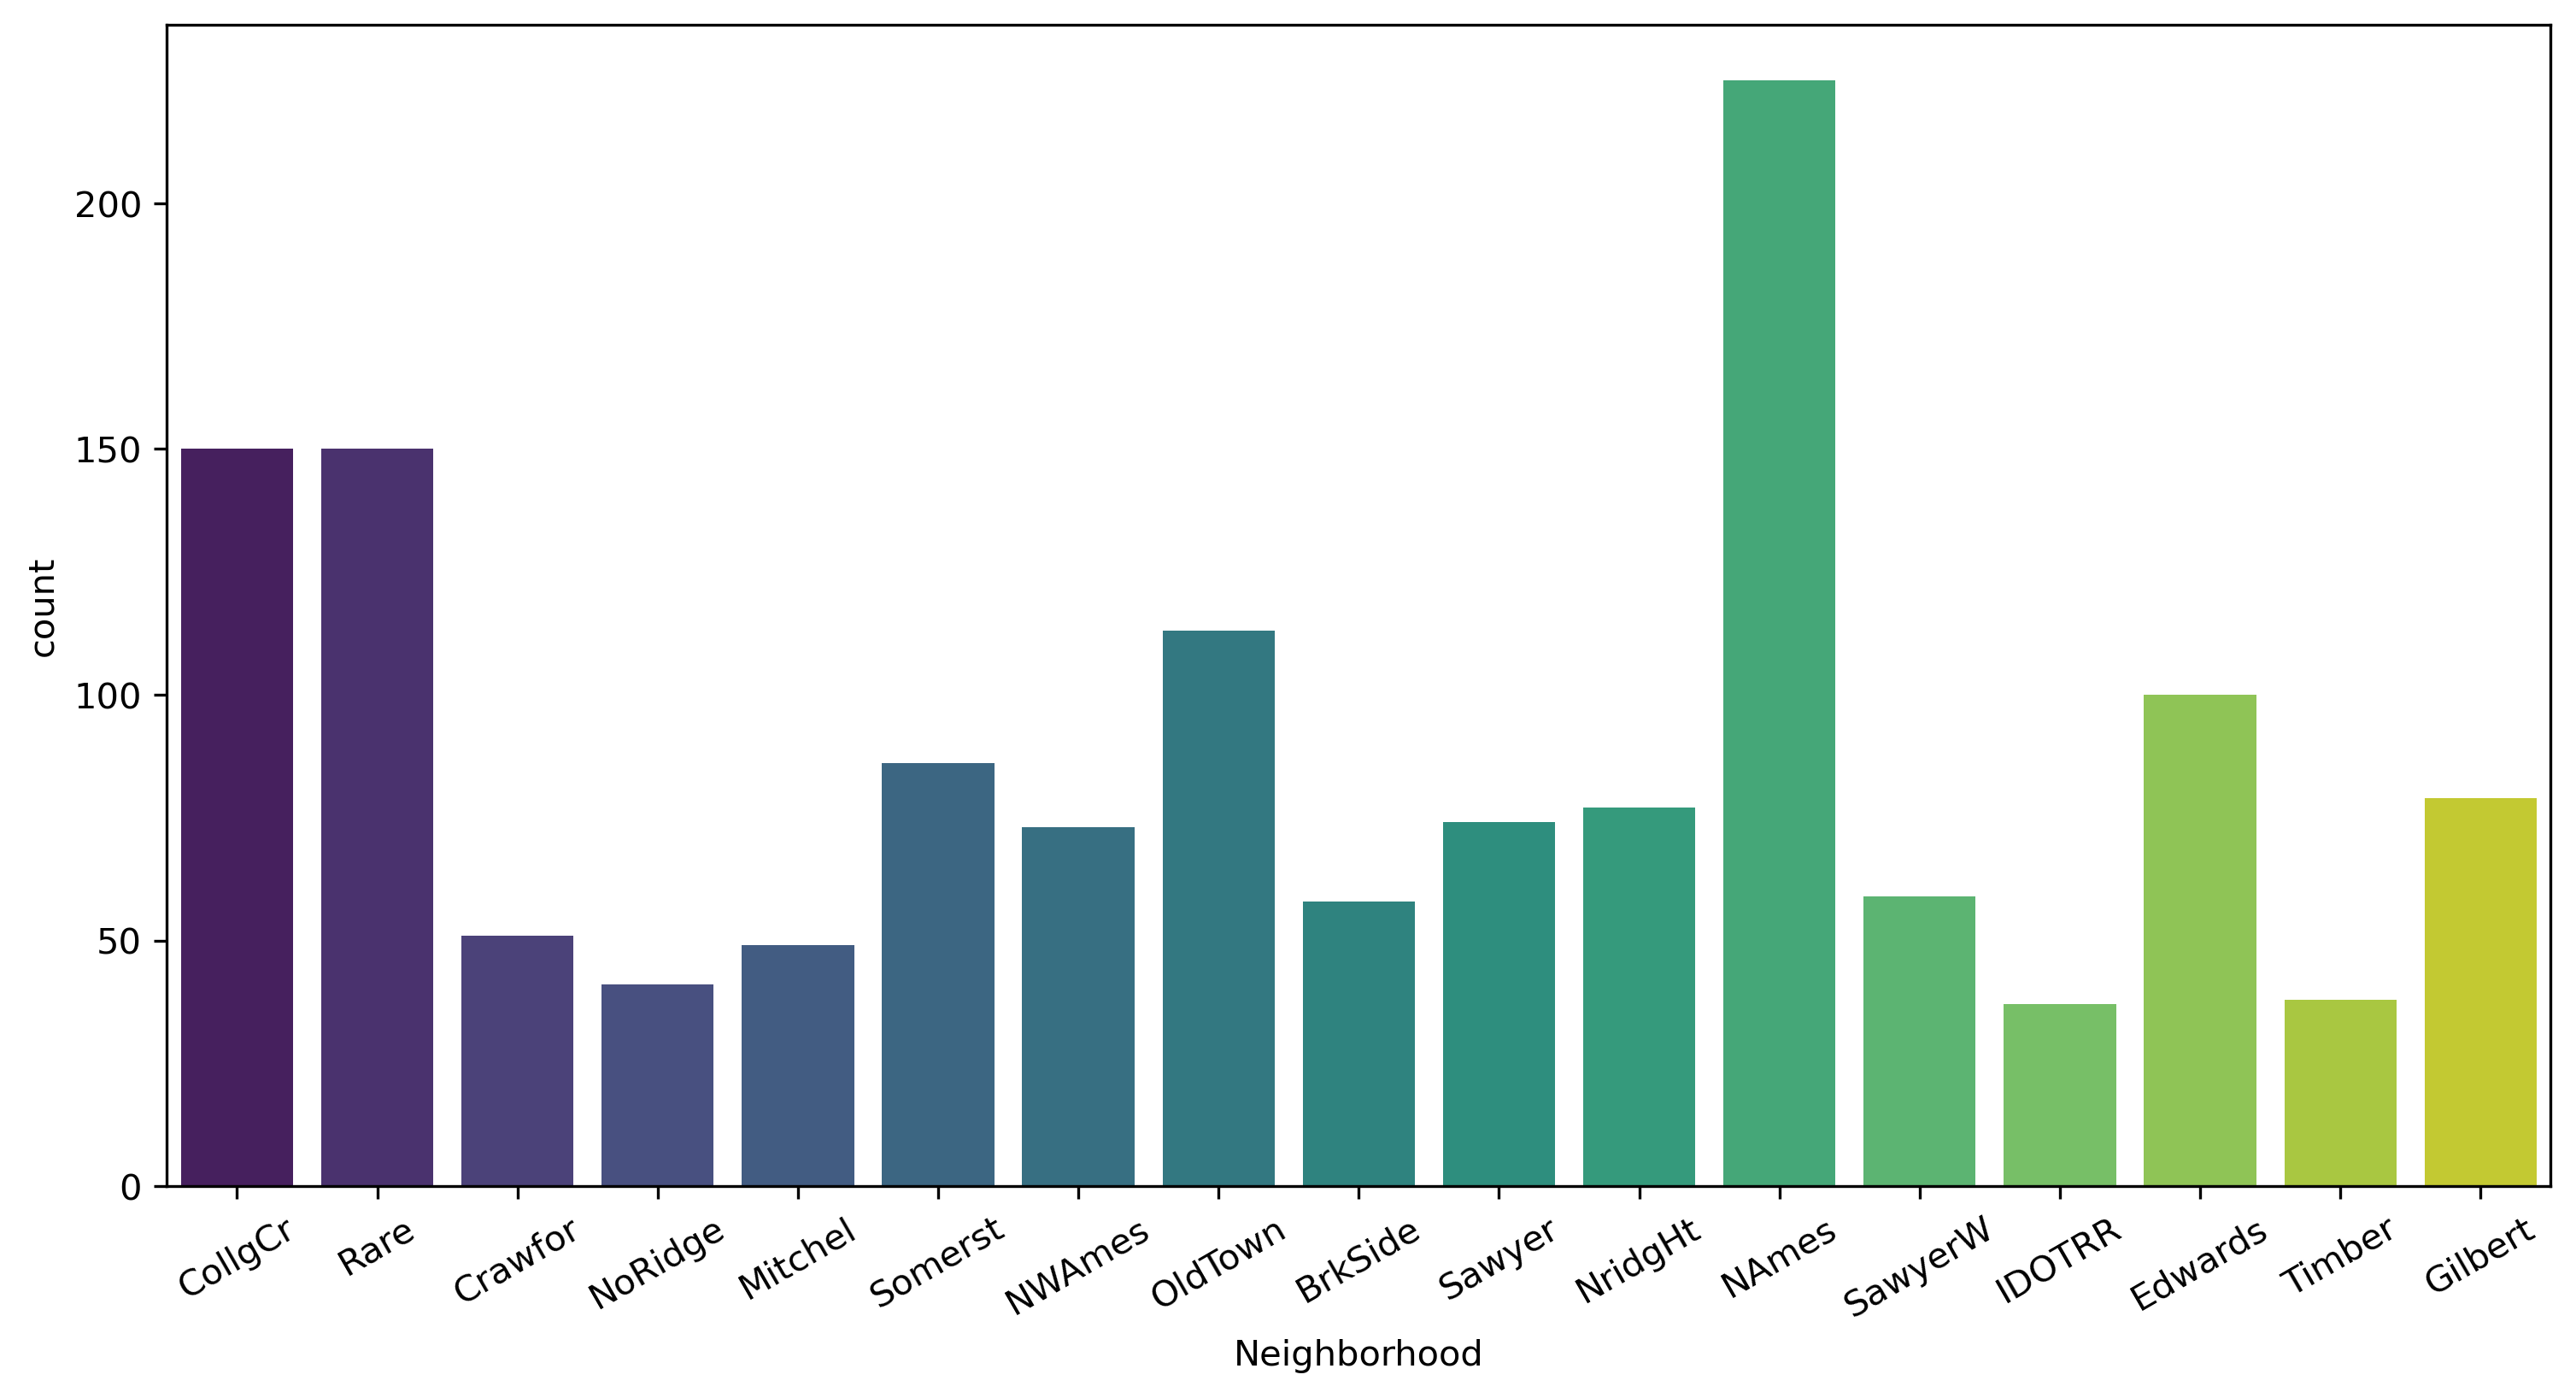

In [122]:
examine_class_bln('Neighborhood')

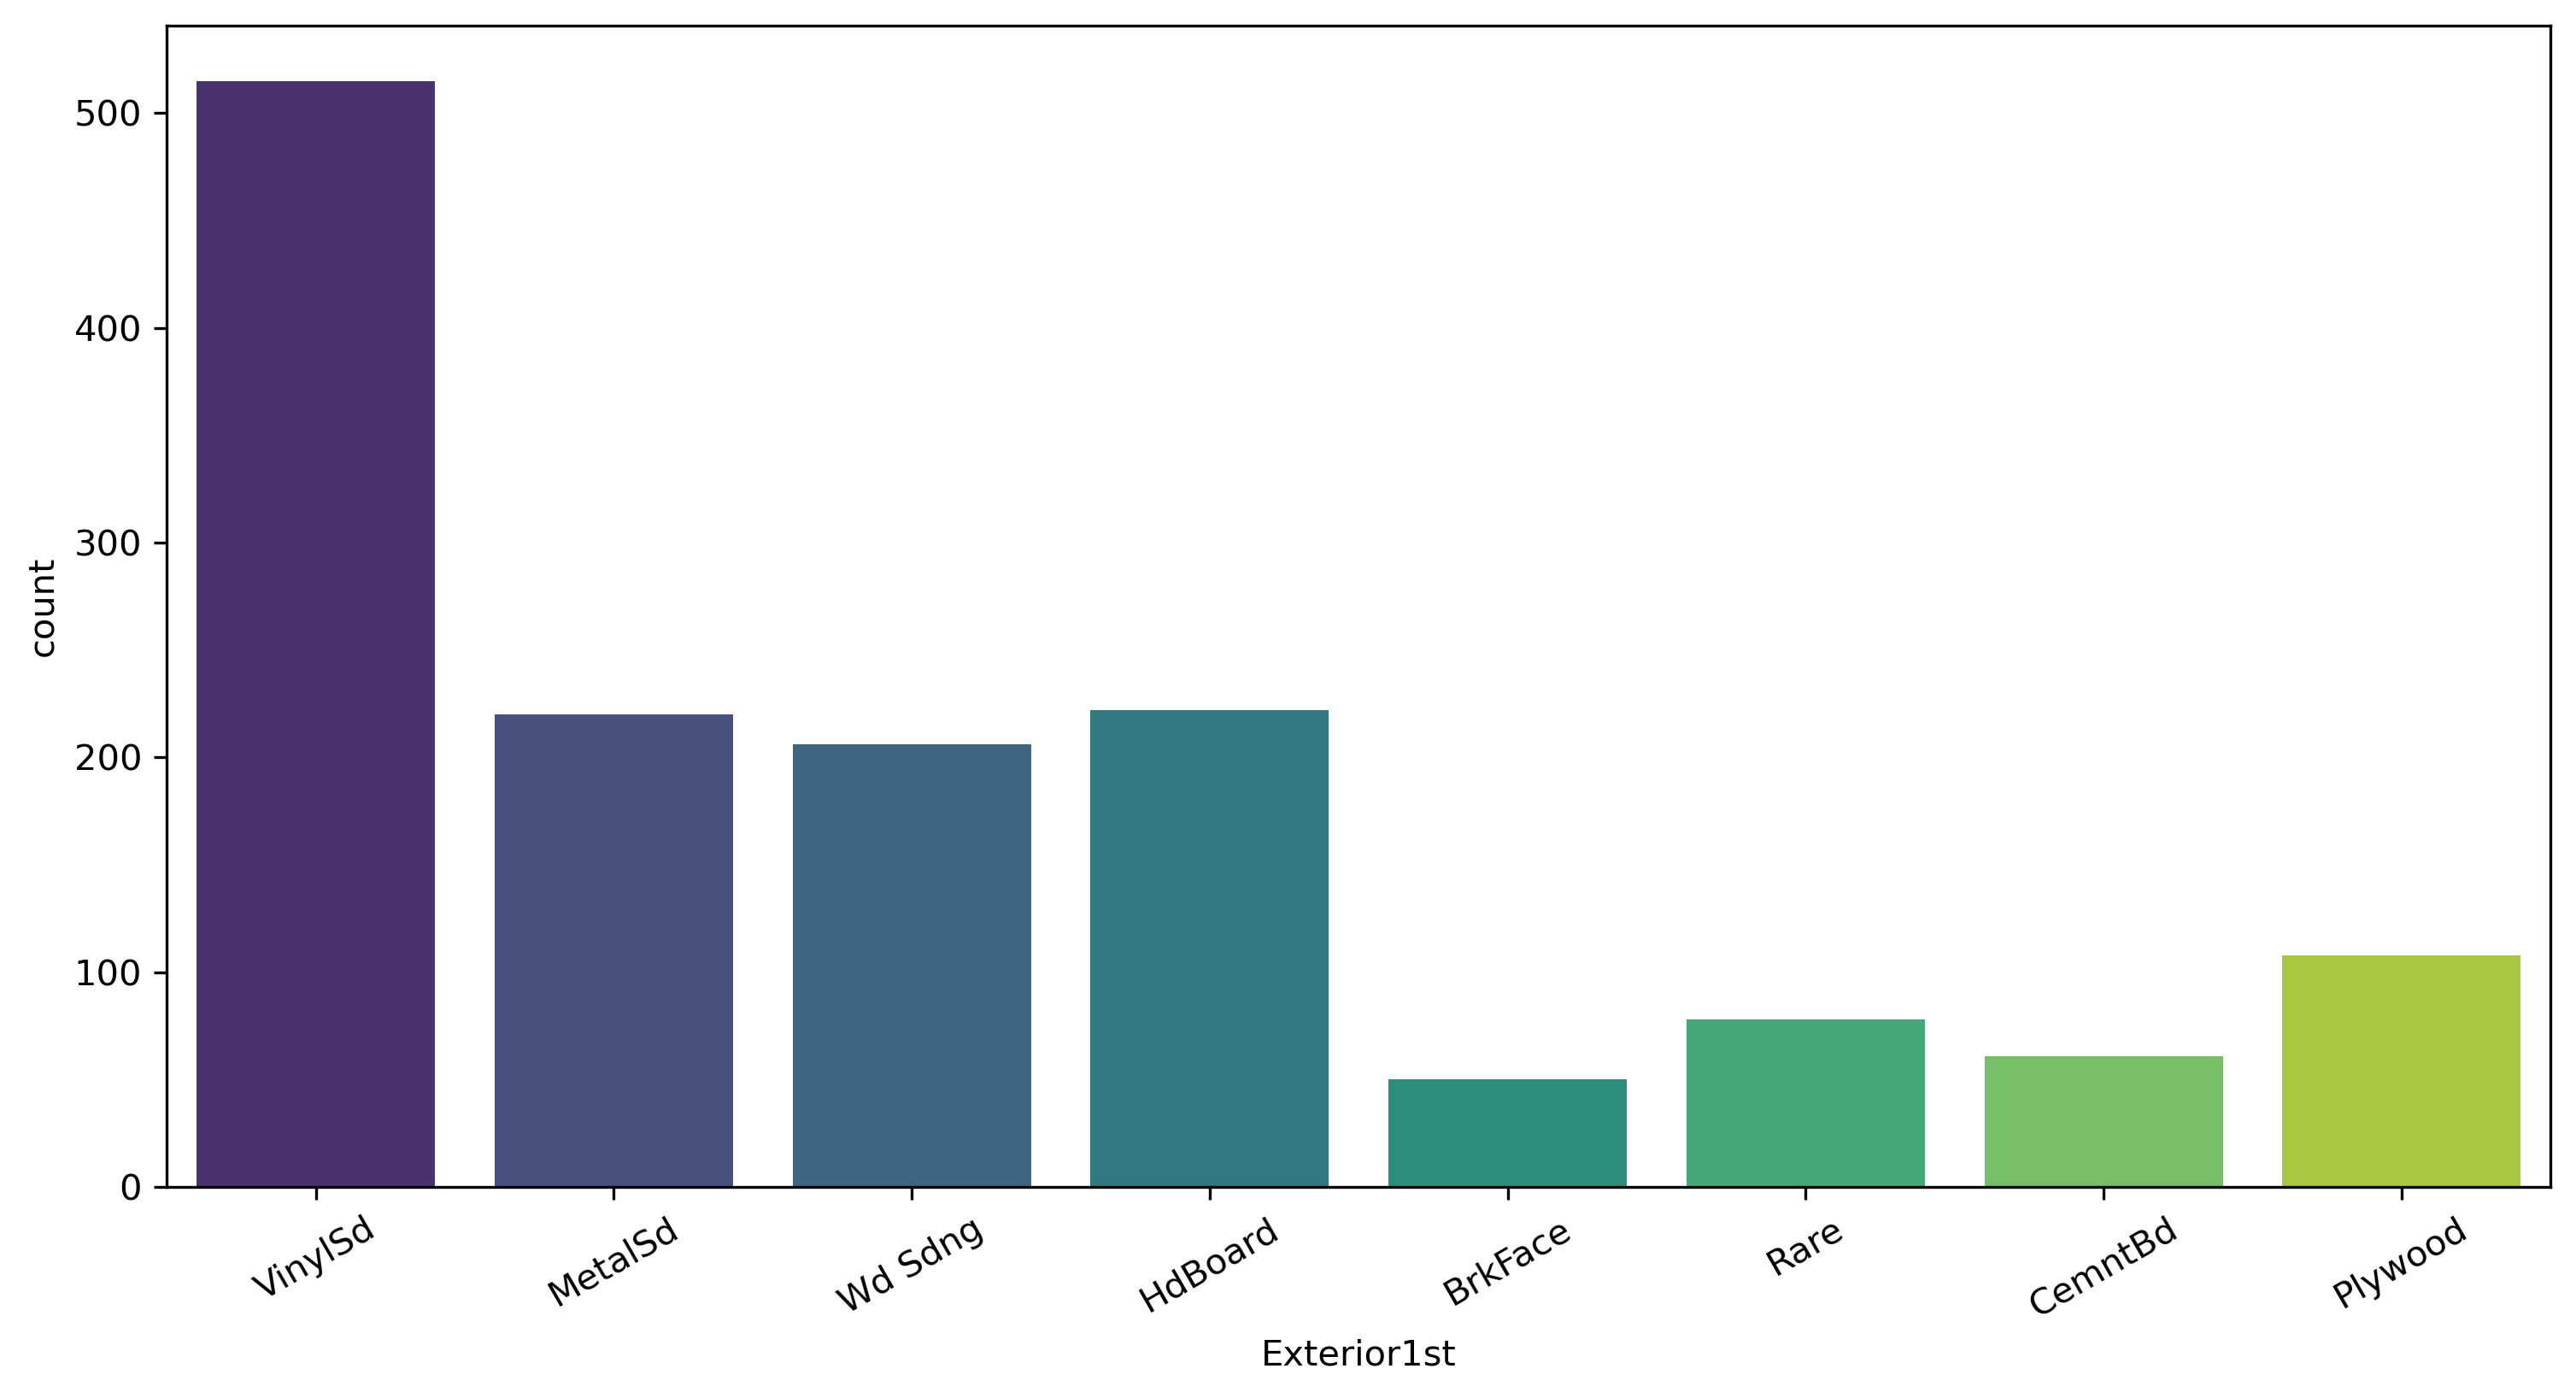

In [123]:
examine_class_bln('Exterior1st')

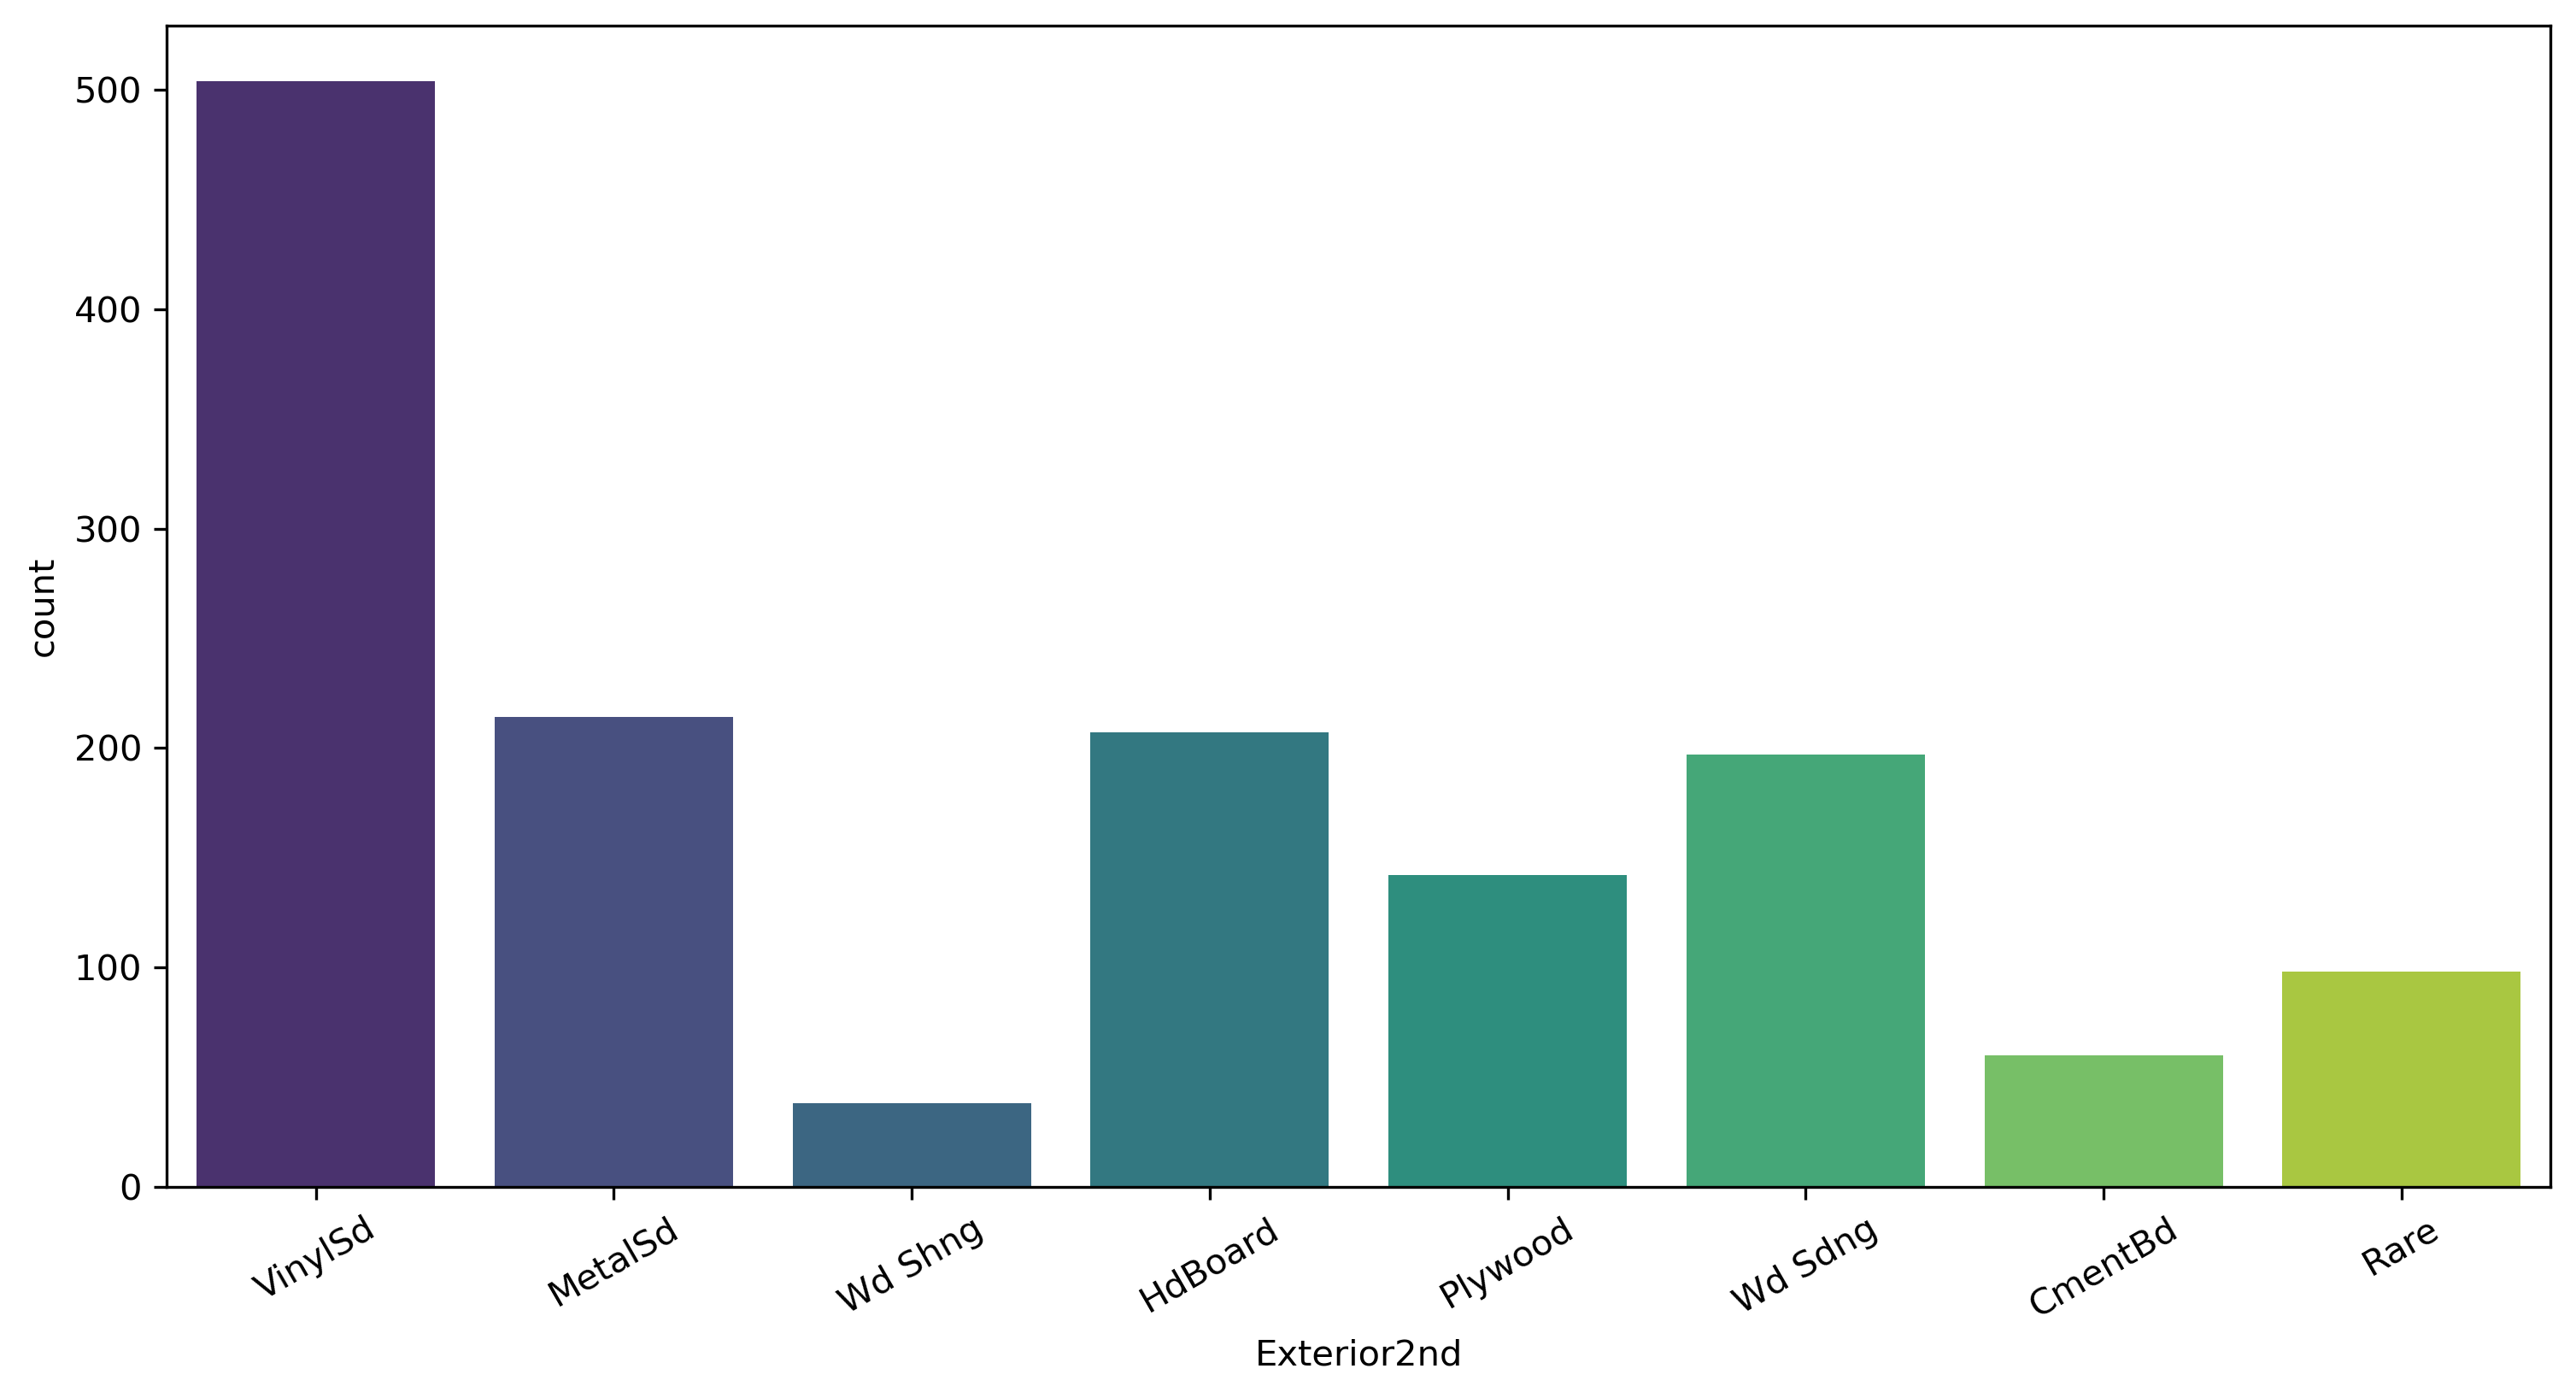

In [124]:
examine_class_bln('Exterior2nd')

In [126]:
encoder = CountFrequencyEncoder(encoding_method='frequency',variables=['Neighborhood','Exterior1st','Exterior2nd'])
encoder.fit(data_e)
encoder.encoder_dict_

{'Neighborhood': {'NAmes': 0.1541095890410959,
  'CollgCr': 0.10273972602739725,
  'Rare': 0.10273972602739725,
  'OldTown': 0.0773972602739726,
  'Edwards': 0.0684931506849315,
  'Somerst': 0.0589041095890411,
  'Gilbert': 0.05410958904109589,
  'NridgHt': 0.05273972602739726,
  'Sawyer': 0.050684931506849315,
  'NWAmes': 0.05,
  'SawyerW': 0.04041095890410959,
  'BrkSide': 0.03972602739726028,
  'Crawfor': 0.03493150684931507,
  'Mitchel': 0.03356164383561644,
  'NoRidge': 0.028082191780821917,
  'Timber': 0.026027397260273973,
  'IDOTRR': 0.025342465753424658},
 'Exterior1st': {'VinylSd': 0.3527397260273973,
  'HdBoard': 0.15205479452054796,
  'MetalSd': 0.1506849315068493,
  'Wd Sdng': 0.1410958904109589,
  'Plywood': 0.07397260273972603,
  'Rare': 0.05342465753424658,
  'CemntBd': 0.04178082191780822,
  'BrkFace': 0.03424657534246575},
 'Exterior2nd': {'VinylSd': 0.3452054794520548,
  'MetalSd': 0.14657534246575343,
  'HdBoard': 0.14178082191780822,
  'Wd Sdng': 0.1349315068493150

In [127]:
data_e = encoder.transform(data_e)
data_e

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageFinish_Fin,PavedDrive_Y,PavedDrive_N,PavedDrive_P,Utilities_AllPub,Utilities_NoSeWa,Street_Pave,Street_Grvl,CentralAir_Y,CentralAir_N
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,0.102740,4,4,6,7,5,2003,...,0,1,0,0,1,0,1,0,1,0
2,20,80.0,9600,0.102740,2,4,5,6,8,1976,...,0,1,0,0,1,0,1,0,1,0
3,60,68.0,11250,0.102740,4,4,6,7,5,2001,...,0,1,0,0,1,0,1,0,1,0
4,70,60.0,9550,0.034932,4,4,6,7,5,1915,...,0,1,0,0,1,0,1,0,1,0
5,60,84.0,14260,0.028082,4,4,6,8,5,2000,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,0.054110,4,4,6,6,5,1999,...,0,1,0,0,1,0,1,0,1,0
1457,20,85.0,13175,0.050000,4,4,5,6,6,1978,...,0,1,0,0,1,0,1,0,1,0
1458,70,66.0,9042,0.034932,4,4,6,7,9,1941,...,0,1,0,0,1,0,1,0,1,0


In [129]:
data_e.select_dtypes(include=np.object).columns

Index([], dtype='object')